# Ejercicio 1: Boston Housing

## Load data

In [8]:
import mglearn
X, y = mglearn.datasets.load_extended_boston()

## Preprocessing

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
X_train.shape

(354, 104)

## Training

In [11]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, StandardScaler

nb_col = X_train.shape[1]

dict_models = [
    {
        'name_clf' : 'SVR (poly)',
        'model': SVR(kernel='poly'),
        'scalers' : {
            'scaler': [StandardScaler(), MinMaxScaler()],
        },
        'grid' : {
            'model__C': [10**k for k in range(-3, 4)],
            'model__gamma': [10**k for k in range(-3, 4)],
            'model__epsilon': [10**k for k in range(-3, 4)],
        }
    },

    {
        'name_clf' : 'SVR (linear)',
        'model': SVR(kernel='linear'),
        'scalers' : {
            'scaler': [None, StandardScaler(), MinMaxScaler()],
        },
        'grid' : {
            'model__C': [10**k for k in range(-3, 4)],
            'model__gamma': [10**k for k in range(-3, 4)],
            'model__epsilon': [10**k for k in range(-3, 4)],
        }
    },

    {
        'name_clf' : 'SVR (rbf)',
        'model': SVR(kernel='rbf'),
        'scalers' : {
            'scaler': [None, StandardScaler(), MinMaxScaler()],
        },
        'grid' : {
            'model__C': [10**k for k in range(-3, 4)],
            'model__gamma': [10**k for k in range(-3, 4)],
            'model__epsilon': [10**k for k in range(-3, 4)],
        }
    },

    {
        'name_clf' : 'SVR (sigmoid)',
        'model': SVR(kernel='sigmoid'),
        'scalers' : {
            'scaler': [None, StandardScaler(), MinMaxScaler()],
        },
        'grid' : {
            'model__C': [10**k for k in range(-3, 4)],
            'model__gamma': [10**k for k in range(-3, 4)],
            'model__epsilon': [10**k for k in range(-3, 4)],
        }
    },
]

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from time import time
from utils import model_evaluation_lr

import warnings
warnings.filterwarnings("ignore")

results = pd.DataFrame(columns=["Model", "CPU time", "MAPE", "RMSE", "R2"])
models = {}
nb_res = 0

for i, dict_clf in enumerate(dict_models):
    model_name = dict_clf['name_clf']
    print(f'Training {model_name}...')

    model = dict_clf['model']

    steps = [
        ('scaler', None),
        ('model', model),
    ]

    pipeline = Pipeline(steps)

    param_grid = {
        **dict_clf['scalers'],
        **dict_clf['grid']
    }

    clf = GridSearchCV(pipeline, param_grid=param_grid, cv=5, n_jobs=-1, verbose= 1, scoring='r2')

    start_time = time()
    clf.fit(X_train, y_train)
    end_time = time()
    
    print(f"Best params {model_name}: \n{clf.best_params_}")

    eval = model_evaluation_lr(clf, X_test, y_test)
    
    models[model_name] = clf

    results.loc[nb_res] = [model_name, round(end_time - start_time, 1), eval['mape'], eval['rmse'], eval['r2']]
    nb_res += 1

    print(f"CPU Time: {round(end_time - start_time, 1)}s")
    print()

Training SVR (poly)...
Fitting 5 folds for each of 686 candidates, totalling 3430 fits


Best params SVR (poly): 
{'model__C': 100, 'model__epsilon': 1, 'model__gamma': 0.1, 'scaler': MinMaxScaler()}
CPU Time: 304.3s

Training SVR (linear)...
Fitting 5 folds for each of 1029 candidates, totalling 5145 fits
Best params SVR (linear): 
{'model__C': 100, 'model__epsilon': 1, 'model__gamma': 0.001, 'scaler': None}
CPU Time: 783.2s

Training SVR (rbf)...
Fitting 5 folds for each of 1029 candidates, totalling 5145 fits
Best params SVR (rbf): 
{'model__C': 1000, 'model__epsilon': 1, 'model__gamma': 0.1, 'scaler': MinMaxScaler()}
CPU Time: 3.4s

Training SVR (sigmoid)...
Fitting 5 folds for each of 1029 candidates, totalling 5145 fits
Best params SVR (sigmoid): 
{'model__C': 1000, 'model__epsilon': 0.1, 'model__gamma': 0.01, 'scaler': None}
CPU Time: 2.9s



## Results

In [13]:
print(results.to_string(index=False))

        Model  CPU time  MAPE  RMSE    R2
   SVR (poly)     304.3 0.109 3.200 0.863
 SVR (linear)     783.2 0.116 3.507 0.835
    SVR (rbf)       3.4 0.117 3.121 0.869
SVR (sigmoid)       2.9 0.129 3.891 0.797


The clear winner is the SVR with rbf kernel, because it has the best R2 and the lowest MAPE and the execution time is really close to the fastest

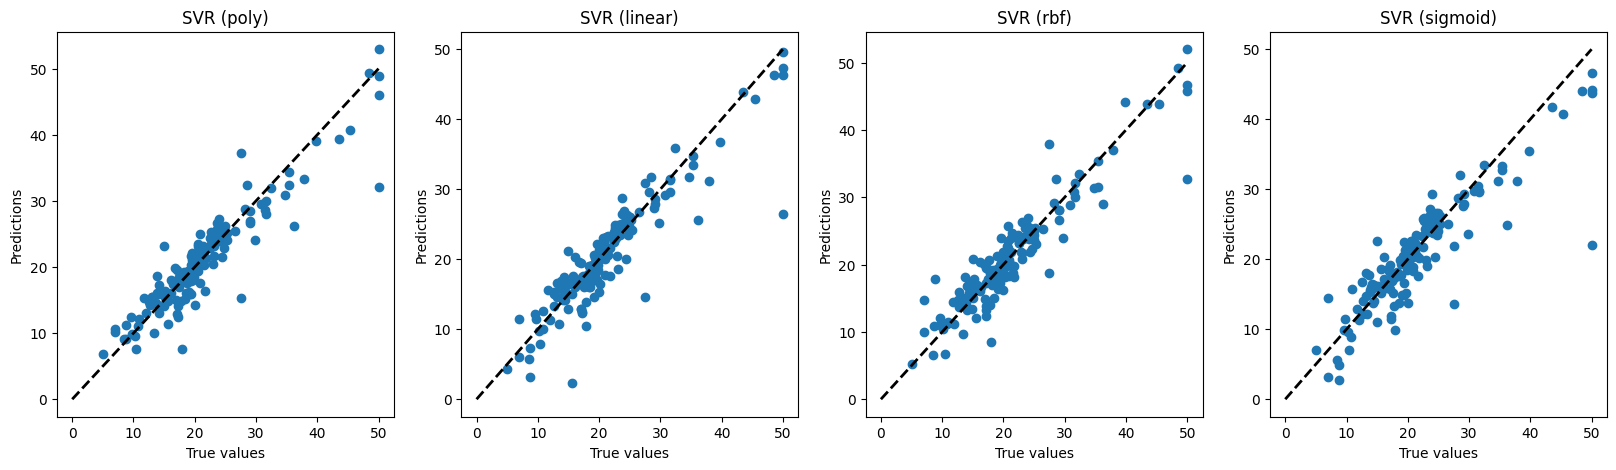

In [18]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, model_name in enumerate(models.keys()):
    model = models[model_name]
    y_pred = model.predict(X_test)

    axs[i].plot([0, y_test.max()], [0, y_test.max()], 'k--', lw=2)
    axs[i].scatter(y_test, y_pred)
    axs[i].set_xlabel('True values')
    axs[i].set_ylabel('Predictions')
    axs[i].set_title(model_name)

plt.show()

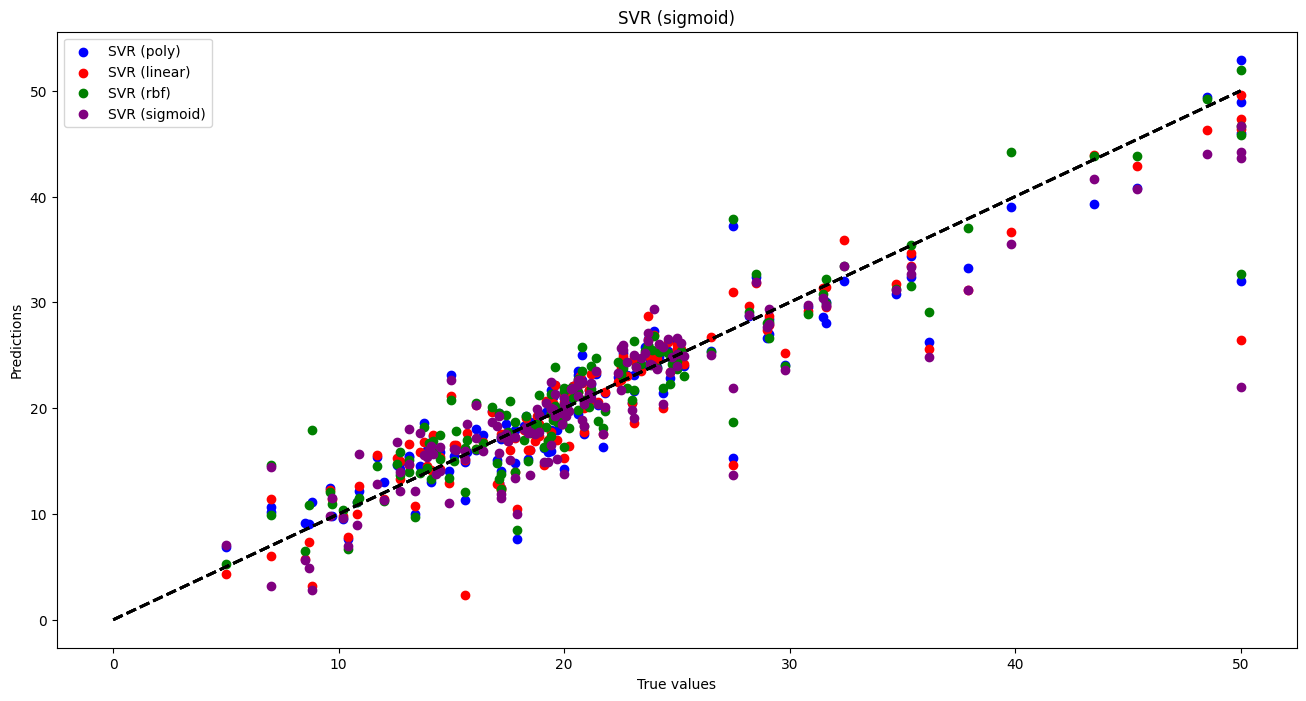

In [19]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(16, 8))
colors = ['blue', 'red', 'green', 'purple']

for i, model_name in enumerate(models.keys()):
    model = models[model_name]
    y_pred = model.predict(X_test)

    axs.plot([0, y_test.max()], [0, y_test.max()], 'k--', lw=2)
    axs.scatter(y_test, y_pred, color=colors[i], label=model_name)
    axs.set_xlabel('True values')
    axs.set_ylabel('Predictions')
    axs.set_title(model_name)
    axs.legend()

plt.show()